<h2 align="center">Handwritten Digits Classification Using Multilayer Perceptron</h2>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

### Load the Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True,transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False,transform=transform, download=True)

In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [5]:
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [6]:
images[2].shape

torch.Size([1, 28, 28])

In [7]:
images[2].squeeze().shape

torch.Size([28, 28])

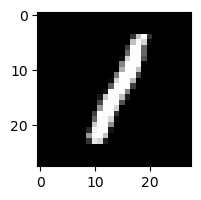

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(images[2].squeeze(), cmap='gray')
plt.show()

In [9]:
labels[2]

tensor(1)

### Train a Fully Connected Neural Network (FCNN)

In [10]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),     # to convert the data in one single array
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU()
        )

    def forward(self, x):
        return self.network(x)
    

In [21]:
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()    # since its a classifier
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()                   # Zero the gradients
        outputs = model(images)                 # Forward pass
        loss = criterion(outputs, labels)       # Compute loss
        loss.backward()                         # Back propagate 
        optimizer.step()                        # Update weights

        running_loss += loss.item()
        
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/5], Loss: 0.8197
Epoch [2/5], Loss: 0.6453
Epoch [3/5], Loss: 0.5991
Epoch [4/5], Loss: 0.5763
Epoch [5/5], Loss: 0.5597


In [23]:
model.eval()    # Switch to evaluation mode

total = 0
correct =0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 76.94%


### Classification Report & Confusion Matrix

In [29]:
model.eval()

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append labels and predictions to lists
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

In [31]:
len(all_predicted)

10000

In [33]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.34      0.98      0.50       980
           1       0.00      0.00      0.00      1135
           2       0.97      0.96      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.00      0.00      0.00       892
           6       0.95      0.98      0.96       958
           7       0.98      0.92      0.95      1028
           8       0.94      0.97      0.96       974
           9       0.88      0.97      0.92      1009

    accuracy                           0.77     10000
   macro avg       0.70      0.77      0.72     10000
weighted avg       0.69      0.77      0.72     10000



C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels, all_predicted)
cm

array([[ 965,    0,    0,    1,    1,    0,    6,    1,    3,    3],
       [1088,    0,    4,    5,    0,    0,    5,    0,    7,   26],
       [   8,    0,  986,   12,    2,    0,    4,    9,   11,    0],
       [   2,    0,    5,  984,    0,    0,    0,    3,    4,   12],
       [   2,    0,    4,    0,  944,    0,    6,    1,    0,   25],
       [ 788,    0,    1,   30,    8,    0,   26,    6,   23,   10],
       [   7,    0,    1,    1,    5,    0,  938,    1,    5,    0],
       [   7,    0,    9,    5,    6,    0,    0,  950,    2,   49],
       [   1,    0,    2,    7,    7,    0,    2,    2,  944,    9],
       [   4,    0,    1,    9,    8,    0,    1,    1,    2,  983]],
      dtype=int64)

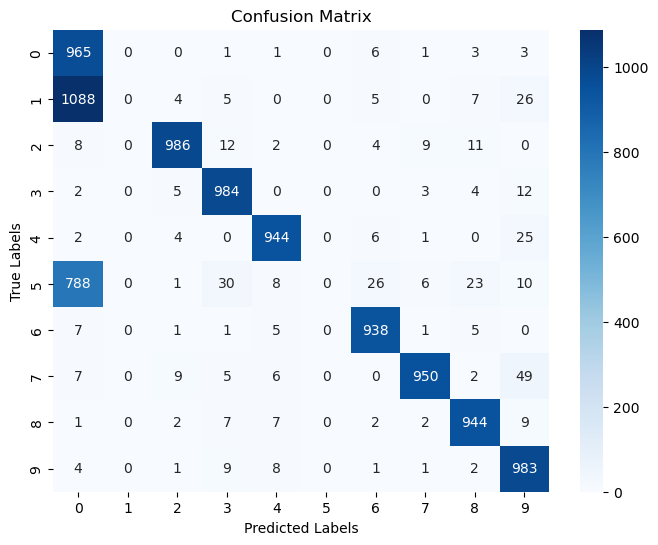

In [37]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()